# Classfication Exersice

### First Step : Download __[Titanic Data](https://www.kaggle.com/c/titanic/data)__  
- **NOTE** : use only  file `train.csv`from data.
#### 1. Import library of pandas and numpy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 2. Load Data using Pandas

In [2]:
df = pd.read_csv('train.csv')

#### 3. Check column in Dataset and Drop useless columns 

- **Hint** : useless columns `Name`, `Ticket`,`PassengerId` and `Cabin`

In [3]:
df_cleaned = df.drop(['Name','Ticket','PassengerId','Cabin'], axis = 1)

#### 4. Checking null values in each column and Handle with Mode

- **Hint** : 
- 1. for `Age` use Mode since there is outliers in this column
- 2. for `Embarked` use Mode since it is a categorical variable


In [4]:
age_mode = df_cleaned['Age'].mode()
embarked_mode = df_cleaned['Embarked'].mode()
nan_replacements = {'Age': age_mode[0],'Embarked': embarked_mode[0]}
df_clean = df_cleaned.fillna(nan_replacements)
df_clean

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


#### 5. Handle Categorical Data using `get_Dummies()` in pandas 

- **Hint** : Handle only columns `Sex` and `Embarked`
- 
 Read this document on how to use [`get_Dummies()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)  

In [5]:
dum = pd.get_dummies(data = df_clean, columns=['Sex', 'Embarked'])
dum

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,24.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


#### 6.  Separate  X ( features ) from  Y (labels)
**Hint** : 
- goal : predict only passengers survive and or not be

In [6]:
X = dum.iloc[:,1:] 
y = dum.iloc[:, :1]

#### 7. Split data into the Training data and Test data by `random_state=5` and `test_size=0.25`

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

#### 8. Scale all Data using `StandardScaler`

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### 9.Building your model ( LogisticRegression Model )
 Use the default sklearn parameters and `random_state=33`

In [9]:
from sklearn.linear_model import LogisticRegression
# Object
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',random_state=33)
#Fitting
LogisticRegressionModel.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=33, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

#### 10. Calculate Accuracy of the model
Hint: use `LogisticRegressionModel.score(X_test, y_test)`

In [10]:
LogisticRegressionModel.score(X_test, y_test)

0.820627802690583

#### 11. Calculate Confusion Matrix ,precision,recall and f1-score for first model

In [11]:
y_pred = LogisticRegressionModel.predict(X_test)
print('Predicted Value for LogisticRegressionModel is : ' , y_pred[:20])
print('Real Value is :  ' , list(y_test[:20].values.ravel()))

Predicted Value for LogisticRegressionModel is :  [0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0]
Real Value is :   [0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0]


In [12]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[125  15]
 [ 25  58]]


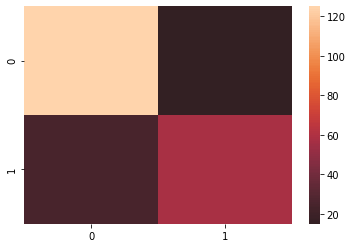

In [13]:
import seaborn as sns
sns.heatmap(CM, center = True)
plt.show()

In [14]:
from sklearn.metrics import classification_report
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : \n', ClassificationReport )

Classification Report is : 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       140
           1       0.79      0.70      0.74        83

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223



#### 12.Building your model ( K-NN Model )
 Use the default sklearn parameters with `n_neighbors= 5`

In [15]:
from sklearn.neighbors import KNeighborsClassifier

KNNClassifierModel = KNeighborsClassifier(n_neighbors= 5,weights ='uniform', # it can be distance
                                          algorithm='auto') # it can be ball_tree, kd_tree,brute

KNNClassifierModel.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### 13. Calculate Accuracy of the K-NN model
Hint: use `KNNClassifierModel.score(X_test, y_test))`

In [16]:
KNNClassifierModel.score(X_test, y_test)

0.8430493273542601

#### 14. Calculate Confusion Matrix ,precision,recall and F1-score for the K-NN model

In [17]:
y_pred = KNNClassifierModel.predict(X_test)
y_pred_prob = KNNClassifierModel.predict_proba(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is for KNN Classifier : \n', CM)

Confusion Matrix is for KNN Classifier : 
 [[127  13]
 [ 22  61]]


In [19]:
from sklearn.metrics import classification_report
ClassificationReport = classification_report(y_test,y_pred)
print('KNN Classification Report is : \n', ClassificationReport )

KNN Classification Report is : 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       140
           1       0.82      0.73      0.78        83

    accuracy                           0.84       223
   macro avg       0.84      0.82      0.83       223
weighted avg       0.84      0.84      0.84       223



#### Hint : use for loop to Calculate score of the K-NN model at different K values

In [20]:
k_range = range(1,10)
scores = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train , y_train.values.ravel())
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test , y_pred) )
    
print(scores)

[0.8116591928251121, 0.8026905829596412, 0.8295964125560538, 0.8161434977578476, 0.8430493273542601, 0.8340807174887892, 0.8385650224215246, 0.8385650224215246, 0.8385650224215246]


Text(0, 0.5, 'testing accuracy')

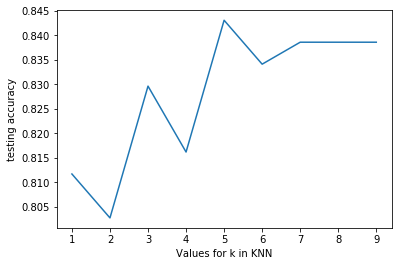

In [21]:
plt.plot(k_range , scores)
plt.xlabel('Values for k in KNN')
plt.ylabel('testing accuracy')